In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import io
from skimage import transform

%matplotlib inline

plt.rcParams['image.cmap'] = 'gray'

In [2]:
image = io.imread('5.PNG', as_gray=True)

In [3]:
image.shape

(354, 319)

In [6]:
image = transform.resize(image, (28, 28), anti_aliasing=True)

In [7]:
image.shape

(28, 28)

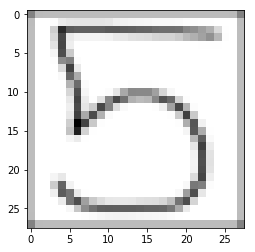

In [9]:
plt.imshow(image)

In [10]:
from tensorflow.python.saved_model import tag_constants


PATH = os.path.join(os.getcwd(), 'mnist_cnn')

tf.reset_default_graph()
graph = tf.get_default_graph()
with tf.Session() as sess:
    print('\nRestoring model...')
    tf.saved_model.loader.load(sess, [tag_constants.SERVING], PATH)
    print('Ok! \n')

    X = graph.get_tensor_by_name('X:0')
    is_training = graph.get_tensor_by_name('is_training:0')
    scores = graph.get_tensor_by_name('scores:0')
    
    val_pred = tf.argmax(scores, axis=1)
    val_pred = sess.run(val_pred, feed_dict={X:image.reshape((1, -1)), is_training:0})
    print("The prediction of validation image is {}".format(val_pred))


Restoring model...
INFO:tensorflow:Restoring parameters from C:\Users\Alex\Desktop\Machine_Learning\cnn\mnist_cnn\variables\variables
Ok! 

The prediction of validation image is [5]
